In [26]:
import time

import matplotlib.pyplot as plt
import numpy
import scipy
import pandas
import seaborn

from src.cellular_automata import CellularAutomata

%matplotlib inline

# Generate simulations

In [53]:
automata_size = 6
automata = CellularAutomata(shape=(automata_size, automata_size))

In [33]:
periods = []
steps_to_reachs = []
n_cells_alive = []
nontrivial_fixed_points = []
periodic_attractors = []

for i in range(1000):
    automata.reset_state()
    initial_state = automata.state
    automata.run_until_attractor_found(n_max_steps=200)
    
    periods.append(automata.attractor_period)
    steps_to_reachs.append(automata.attractor_found_after)
    mean_cells_alive = numpy.sum(numpy.mean(automata.attractor, axis=0))
    n_cells_alive.append(mean_cells_alive)
    
    if mean_cells_alive > 0:
        if automata.attractor_period == 1:
            nontrivial_fixed_points.append(automata.attractor[0])
        else:
            periodic_attractors.append(automata.attractor)

results = pandas.DataFrame({"period": periods, 
                            "steps_to_reach": steps_to_reachs,
                            "n_cells_alive": n_cells_alive})
results.head()

,period,steps_to_reach,n_cells_alive
0,1,12,6.0
1,1,24,0.0
2,1,14,0.0
3,2,10,14.0
4,1,5,0.0


# Analyse results

First, check that the maximum number of steps we waited (200) was actually enough to reach the attractor

In [29]:
results.steps_to_reach.max()

57

Let's now see what kind of attractors we were getting.

### Period length

In [50]:
results["period"].value_counts(normalize=True)

1     0.853
2     0.128
24    0.008
4     0.007
12    0.004
Name: period, dtype: float64

* Most attractors are fixed points
* Even most cyclic attractors are of periodicity 2, longer cycles are rare

### Number of cells alive

In [54]:
results["prop_cells_alive"] = results["n_cells_alive"]/(automata_size*automata_size)
results["prop_cells_alive"].value_counts(normalize=True)

0.000000    0.636
0.166667    0.089
0.388889    0.072
0.111111    0.064
0.083333    0.056
0.222222    0.031
0.138889    0.018
0.194444    0.017
0.319444    0.010
0.138889    0.004
0.444444    0.002
0.305556    0.001
Name: prop_cells_alive, dtype: float64

* Most attractors are dead (~64%)
* Less than half of the cells are alive in any attractor (for cycles, on average over the cycle)

## Attractor types
This is a somewhat arbitrary classification

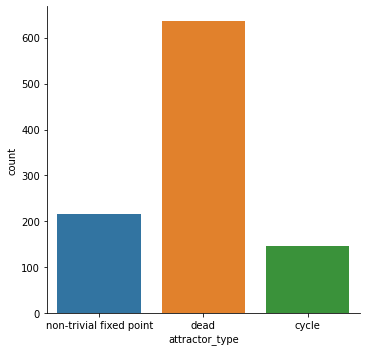

In [55]:
def get_attractor_type(row):
    if row["n_cells_alive"] == 0:
        return "dead"
    if row["period"] == 1:
        return "non-trivial fixed point"
    else:
        return "cycle"
    
results["attractor_type"] = results.apply(get_attractor_type, axis=1)
seaborn.catplot(x="attractor_type", kind="count", data=results)

* Most attractors consist of purely dead cells
* Even most attractors with some cells alive are at a fixed point

### Correlations between period length and number of cells alive

Pearson R:  0.2004689473134538
p-value:  1.589823844130936e-10


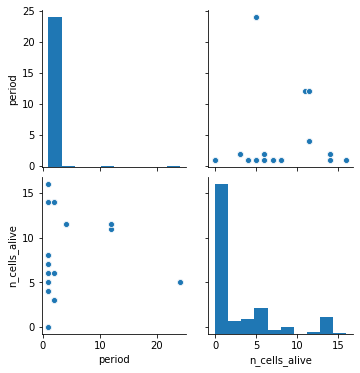

In [57]:
r, p_val = scipy.stats.pearsonr(results["period"], results["n_cells_alive"])
print("Pearson R: ", r)
print("p-value: ", p_val)

seaborn.pairplot(results[["period", "n_cells_alive"]])

* No significancy correlation between the length of the period and the number of cells alive